<a href="https://colab.research.google.com/github/HuiningLiu02/TIF360-Advanced-machine-learning-with-neural-networks/blob/main/Ch03_CNN/hw/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Neural Networks in PyTorch

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch03_CNN/ec03_1_cnn/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></div>

This notebook provides you with a set of code examples to implement neural networks with PyTorch.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 3-1 from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Understanding Convolutions

Implement a moving average with a 1D convolution ...

In [ ]:
import numpy as np

signal = np.array([0, 2, 0, 2, 0, 2, 0, 2, 0])

filter1d = np.ones(2) / 2

conv1d_length = signal.shape[0] - filter1d.shape[0] + 1
conv1d = np.zeros((conv1d_length,))
for i in range(conv1d_length):
    conv1d[i] = np.sum(signal[i:i + filter1d.shape[0]] * filter1d)

print(conv1d)

[1. 1. 1. 1. 1. 1. 1. 1.]


... and implement a 2D convolution.

In [ ]:
image = np.array([
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
])

filter2d = np.ones((2, 2)) / 4

conv2d_height = image.shape[0] - filter2d.shape[0] + 1
conv2d_width = image.shape[1] - filter2d.shape[1] + 1
conv2d = np.zeros((conv2d_height, conv2d_width))
for i in range(conv2d_height):
    for j in range(conv2d_width):
        conv2d[i, j] = np.sum(
            image[i:i + filter2d.shape[0], j:j + filter2d.shape[1]] * filter2d
        )

print(conv2d)

[[1.  0.5 0.  0.5 1.  0.5 0.  0.5 1. ]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.  0.5 1.  0.5 0.  0.5 1.  0.5 0. ]]


## Creating a Sample Image

Create a sample image in PyTorch (note the position of the color channel) ...

In [1]:
import torch

H, W, D, S = 12, 16, 16, 4  # Height, width, square size.
image = torch.zeros(1, H, W, D)
for idx in range(0, H, S):
    for idy in range(0, W, S):
      for idz in range(0, D, S):
        image[0, idx:idx + S, idy:idy + S, idz:idz + S] = (-1) ** (idx // S + idy // S + idz // S)

... implement a function to render the image ...

In [27]:
import matplotlib.pyplot as plt

def plot_image(image, slice_indices=[4, 8, 12]):
    """Render an image."""

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i,idx in enumerate(slice_indices):
      slice_img = image[:, :, idx]
      ax = axes[i]
      im = ax.imshow(slice_img, cmap="gray", aspect="equal", vmin=-2, vmax=2,
                       extent=[0, W, 0, H])
      ax.set_title(f"Slice {idx}")
      ax.set_xticks(range(0, W + 1))
      ax.set_yticks(range(0, H + 1))
      ax.grid(color="red", linewidth=1)

    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
    plt.show()

... and plot the image.

## Implementing Convolutional Layers

Implement a convolutional layer in PyTorch ...

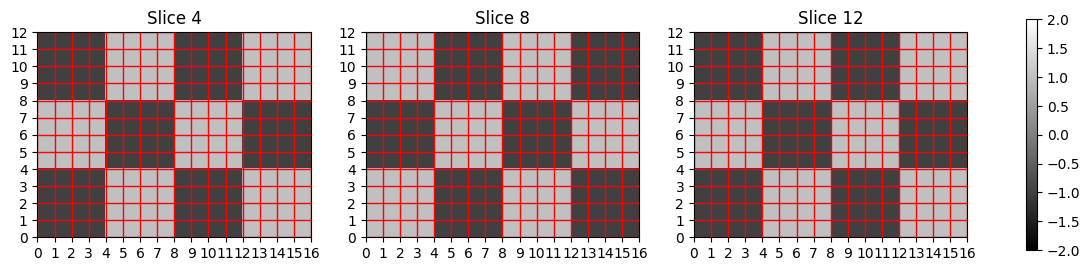

In [28]:
plot_image(image.squeeze())

In [56]:
import torch.nn as nn

conv = nn.Conv3d(in_channels=1, out_channels=2, kernel_size=(1, 3, 1), bias=False)
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :, :] = torch.tensor([[[[1, 1, 1],]]]).reshape(1, 3, 1) / 3
filters[1, 0, :, :, :] = torch.tensor([[[ -1, 0, 1],]]).reshape(1, 3, 1)
conv.weight = nn.Parameter(filters)

features_conv = conv(image.unsqueeze(0))

... implement a function to render the multiple channels of an image ...

In [57]:
print(torch.tensor([[[ -1, 0, 1],]]).reshape(1, 3, 1))

tensor([[[-1],
         [ 0],
         [ 1]]])


In [58]:
def plot_channels(channels, figsize=(15, 5)):
    """Render multiple channels."""
    fig, axs = plt.subplots(1, channels.shape[0], figsize=figsize)
    for channel, ax, i in zip(channels, axs, range(channels.shape[0])):
        im = ax.imshow(channel, cmap="gray", aspect="equal", vmin=-2, vmax=2,
                       extent=[0, channel.shape[1], 0, channel.shape[0]])
        plt.colorbar(im)
        ax.set_title(f"Channel {i}", fontsize=24)
        ax.set_xticks(range(0, channel.shape[1] + 1))
        ax.set_yticks(range(0, channel.shape[0] + 1))
        ax.grid(color="red", linewidth=1)
    plt.show()

... and plot the feature maps.

In [59]:
print(features_conv[0].detach()[1, :, :, 0])

tensor([[ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.],
        [ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.],
        [ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.],
        [ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.],
        [ 0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0.],
        [ 0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0.],
        [ 0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0.],
        [ 0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0.],
        [ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.],
        [ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.],
        [ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.],
        [ 0.,  0., -2., -2.,  0.,  0.,  2.,  2.,  0.,  0., -2., -2.,  0.,  0.]])


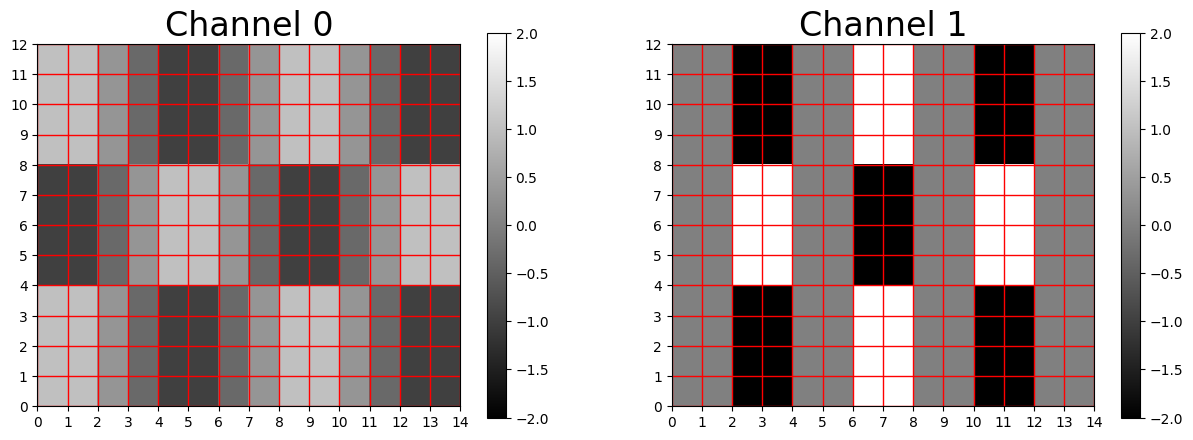

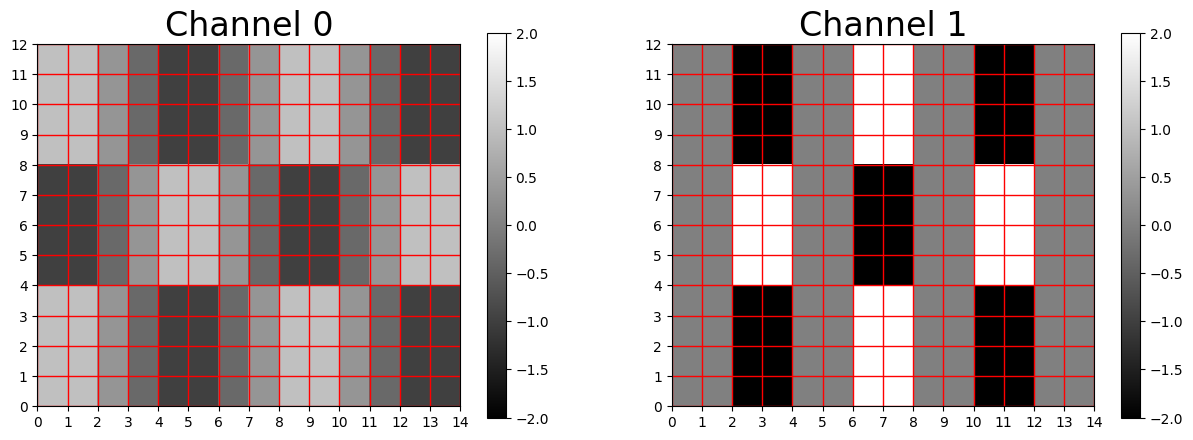

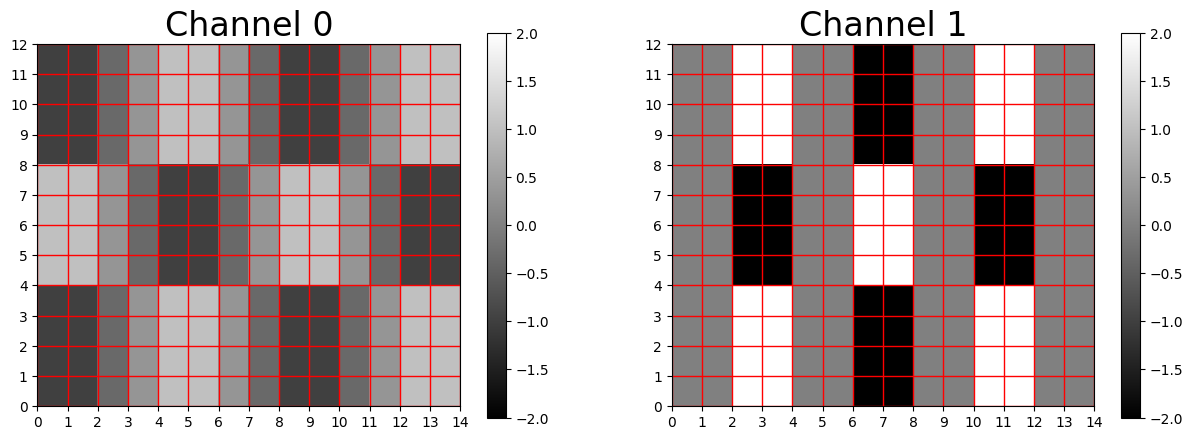

In [61]:
#plot the 1th slide
plot_channels(features_conv[0].detach()[:, :, :, 0])
#plot the 3th slide
plot_channels(features_conv[0].detach()[:, :, :, 2])
#plot the 5th slide
plot_channels(features_conv[0].detach()[:, :, :, 4])


... and of the neural network output.